# Random Forest

In [1]:
import pickle
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


## Import Data

In [2]:
# Dataframe
path_df = "../Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "../Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "../Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "../Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "../Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

## Hyperparameter tuning with cross-validation

Let see list of RandomForestClassifier that can be tune during training process

In [3]:
randomforest = RandomForestClassifier(random_state = 10)

print('Parameters than can be tune:\n')
pprint(randomforest.get_params())

Parameters than can be tune:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


## Hyperparameter tuning with Randomized Search Cross Validation

In [15]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 900, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create list of parameter that will be tested during Randomized Search Cross Validation
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(parameters)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [300, 450, 600, 750, 900]}


In [16]:
classifier = RandomForestClassifier(random_state=10)

random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=parameters,
                                   n_iter=30,
                                   scoring='accuracy',
                                   cv=3,
                                   n_jobs=4,
                                   verbose=3, 
                                   random_state=10)

random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_iter=30, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 450, 600, 750,
                                                         900]},
                   random_state=10, scoring='accuracy', verbose=3)

Let see the result of Hyperparameter tuning

In [17]:
print("The best hyperparameters after Random Search cross-validation are:")
pprint(random_search.best_params_)
print("The accuracy of a model is:")
print(random_search.best_score_)

The best hyperparameters after Random Search cross-validation are:
{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}
The accuracy of a model is:
0.8016339207345892


## Hyperparameter tuning with Grid Search Cross Validation

In [19]:
# Create the parameters based on the results of random search 
bootstrap = [False]
max_depth = [90, 100, None]
max_features = ['auto']
min_samples_leaf = [1, 2]
min_samples_split = [9, 10, 11]
n_estimators = [300]

parameters = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}


classifier = RandomForestClassifier(random_state=10)

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 10)

grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=cv_sets,
                           n_jobs=6,
                           verbose=5)

grid_search.fit(features_train, labels_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=10, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=10), n_jobs=6,
             param_grid={'bootstrap': [False], 'max_depth': [90, 100, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [300]},
             scoring='accuracy', verbose=5)

Let see what is Hyperparameters state after grid search cross-validation:

In [20]:
print("The best hyperparameters after Random Search cross-validation are:")
pprint(grid_search.best_params_)
print("The accuracy of a model is:")
print(grid_search.best_score_)

The best hyperparameters after Random Search cross-validation are:
{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'n_estimators': 300}
The accuracy of a model is:
0.7986906710310966


In [21]:
best_random_forest_classifier = grid_search.best_estimator_
best_random_forest_classifier

RandomForestClassifier(bootstrap=False, min_samples_split=11, n_estimators=300,
                       random_state=10)

## Model training and evaluation

In [22]:
best_random_forest_classifier.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, min_samples_split=11, n_estimators=300,
                       random_state=10)

In [23]:
predictions = best_random_forest_classifier.predict(features_test)

In [25]:
# Training set accuracy
print("Training set accuracy is: ")
print(accuracy_score(labels_train, best_random_forest_classifier.predict(features_train)))

Training set accuracy is: 
0.9999324826142731


In [26]:
# Test set accuracy
predictions = best_random_forest_classifier.predict(features_test)
print("Test set accuracy is: ")
print(accuracy_score(labels_test, predictions))

Test set accuracy is: 
0.8111216131064902


In [27]:
print("Classification report")
print(classification_report(labels_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       855
           1       0.87      0.73      0.79       446
           2       0.74      0.67      0.70       705
           3       0.78      0.77      0.77       751
           4       0.92      0.92      0.92      1110
           5       0.76      0.74      0.75       971
           6       0.87      0.91      0.89       768
           7       0.77      0.82      0.79       742

    accuracy                           0.81      6348
   macro avg       0.81      0.80      0.80      6348
weighted avg       0.81      0.81      0.81      6348



## Confusion matrix
Create confusion matrix to visualize what are the errors of algorithum

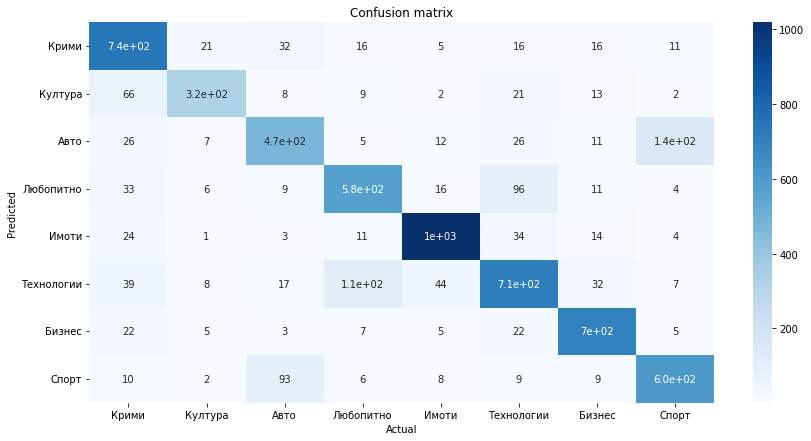

In [28]:

conf_matrix = confusion_matrix(labels_test, predictions)

plt.figure(figsize=(14,7))
plt.title('Confusion matrix')

sns.heatmap(
    conf_matrix, 
    xticklabels=df["topic"].unique(), 
    yticklabels=df["topic"].unique(),
    cmap="Blues",
    annot=True,
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()